In [10]:
from models import *
from utils import *  
from models.vit_quant import VisionTransformer
from functools import partial
import hook 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Module, Parameter
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
model = VisionTransformer(
        patch_size=16,
        embed_dim=192,
        depth=12,
        num_heads=3,
        mlp_ratio=4,
        qkv_bias=True,
        norm_layer=partial(IntLayerNorm, eps=1e-6),
        # norm_layer=partial(IntLayerNorm, eps=1e-6),
        # **kwargs,
    )
# checkpoint = torch.hub.load_state_dict_from_url(
#         url="https://dl.fbaipublicfiles.com/deit/deit_tiny_patch16_224-a1311bcf.pth",
#         map_location="cpu",
#         check_hash=True,
#     )
ckpt = torch.load("./results_org/checkpoint.pth.tar", map_location='cpu')

# 如果里面包含了 "model" 键，就取它；否则就直接把整个 ckpt 当作 state_dict
state_dict = ckpt["model"] if "model" in ckpt else ckpt

model.load_state_dict(state_dict, strict=False)


RuntimeError: Error(s) in loading state_dict for VisionTransformer:
	size mismatch for qact_input.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for patch_embed.qact.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for qact_pos.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.norm1.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.attn.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.attn.qact_attn1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.attn.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.attn.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.attn.matmul_1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.norm2.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.mlp.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.mlp.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.mlp.qact_gelu.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.0.qact4.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.norm1.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.attn.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.attn.qact_attn1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.attn.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.attn.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.attn.matmul_1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.norm2.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.mlp.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.mlp.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.mlp.qact_gelu.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.1.qact4.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.norm1.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.attn.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.attn.qact_attn1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.attn.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.attn.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.attn.matmul_1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.norm2.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.mlp.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.mlp.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.mlp.qact_gelu.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.2.qact4.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.norm1.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.attn.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.attn.qact_attn1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.attn.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.attn.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.attn.matmul_1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.norm2.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.mlp.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.mlp.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.mlp.qact_gelu.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.3.qact4.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.norm1.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.attn.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.attn.qact_attn1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.attn.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.attn.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.attn.matmul_1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.norm2.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.mlp.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.mlp.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.mlp.qact_gelu.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.4.qact4.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.norm1.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.attn.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.attn.qact_attn1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.attn.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.attn.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.attn.matmul_1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.norm2.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.mlp.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.mlp.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.mlp.qact_gelu.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.5.qact4.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.norm1.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.attn.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.attn.qact_attn1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.attn.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.attn.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.attn.matmul_1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.norm2.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.mlp.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.mlp.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.mlp.qact_gelu.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.6.qact4.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.norm1.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.attn.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.attn.qact_attn1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.attn.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.attn.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.attn.matmul_1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.norm2.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.mlp.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.mlp.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.mlp.qact_gelu.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.7.qact4.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.norm1.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.attn.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.attn.qact_attn1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.attn.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.attn.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.attn.matmul_1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.norm2.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.mlp.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.mlp.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.mlp.qact_gelu.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.8.qact4.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.norm1.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.attn.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.attn.qact_attn1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.attn.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.attn.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.attn.matmul_1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.norm2.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.mlp.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.mlp.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.mlp.qact_gelu.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.9.qact4.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.norm1.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.attn.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.attn.qact_attn1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.attn.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.attn.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.attn.matmul_1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.norm2.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.mlp.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.mlp.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.mlp.qact_gelu.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.10.qact4.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.norm1.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.attn.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.attn.qact_attn1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.attn.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.attn.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.attn.matmul_1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.norm2.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.qact3.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.mlp.qact1.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.mlp.qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.mlp.qact_gelu.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for blocks.11.qact4.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for norm.norm_scaling_factor: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([1]).
	size mismatch for qact2.act_scaling_factor: copying a param with shape torch.Size([]) from checkpoint, the shape in current model is torch.Size([1]).

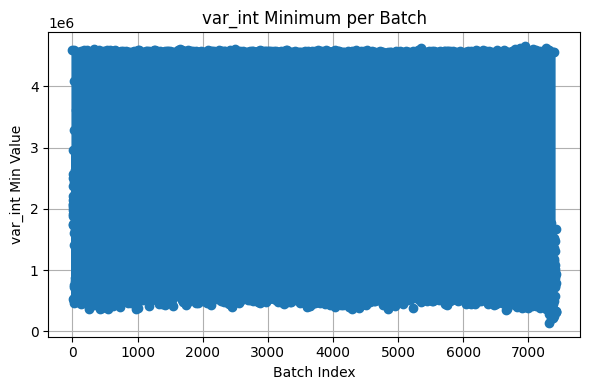

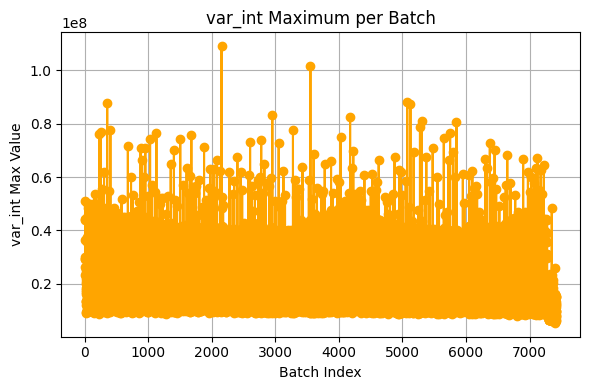

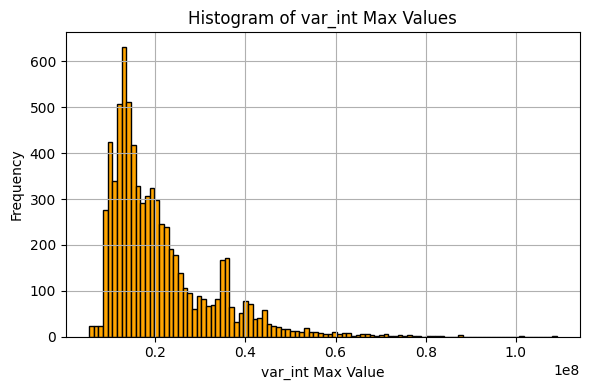

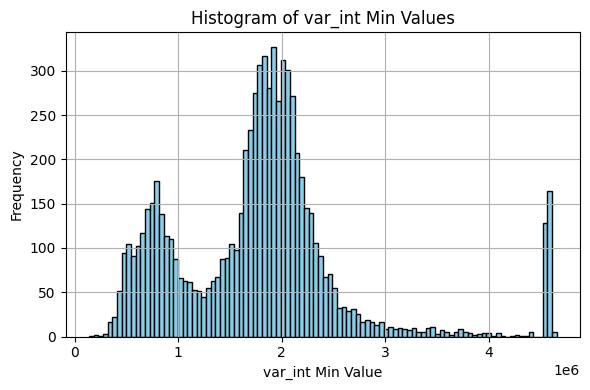

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 1. 讀檔，解析每一行的 min / max
mins, maxs = [], []
pattern = re.compile(r"var_int range: ([\d\.]+) ~ ([\d\.]+)")
with open('var_int_log.txt', 'r') as f:
    for line in f:
        m = pattern.search(line)
        if not m:
            continue
        vmin, vmax = float(m.group(1)), float(m.group(2))
        mins.append(vmin)
        maxs.append(vmax)

# 2. 轉成 numpy（可選）
mins = np.array(mins)
maxs = np.array(maxs)
batches = np.arange(len(mins))

# 3. 畫圖
# 2. 單獨畫出 var_int 最小值
plt.figure(figsize=(6, 4))
plt.plot(batches, mins, marker='o')
plt.title('var_int Minimum per Batch')
plt.xlabel('Batch Index')
plt.ylabel('var_int Min Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. 單獨畫出 var_int 最大值
plt.figure(figsize=(6, 4))
plt.plot(batches, maxs, marker='o', color='orange')
plt.title('var_int Maximum per Batch')
plt.xlabel('Batch Index')
plt.ylabel('var_int Max Value')
plt.grid(True)
plt.tight_layout()
plt.show()


# 畫 var_int 最大值的直方圖
plt.figure(figsize=(6, 4))
plt.hist(maxs, bins=100, color='orange', edgecolor='black')
plt.title('Histogram of var_int Max Values')
plt.xlabel('var_int Max Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# 畫 var_int 最小值的直方圖
plt.figure(figsize=(6, 4))
plt.hist(mins, bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of var_int Min Values')
plt.xlabel('var_int Min Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
